In [63]:
import numpy as np
import pandas as pd

np.random.seed(123)

# Creating dataframe with two classes
n_samples = 1000

# 90% of the samples belongs to class 0
class_0_ratio = 0.9

# Calculating the number of datapoints of class 0 sample
n_class_0 = int(n_samples * class_0_ratio)

# determinig the number of class 1 samples
n_class_1 = n_samples - n_class_0

In [2]:
n_class_0,n_class_1

(900, 100)

In [ ]:
## Creating dataframe with imbalanced dataset

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0,scale=1, size=n_class_0),
    'target': np.zeros(n_class_0)   # or 'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=0,scale=1, size=n_class_1),
    'target': np.ones(n_class_1)    # or 'target': [1] * n_class_1    prints as many 1s as the datapoints to label the class_1 data
})

In [ ]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)
df

In [ ]:
# Upsampling
# data stratification or class based splitting of the dataset based on the target variable.
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]


In [ ]:
from sklearn.utils import resample
df_minority_updated = resample(df_minority,replace=True, # sampling with replacement, same sample can be selected multiple times
         n_samples=len(df_majority), # match the majority class size
         random_state=42)  # ensure reproducibility

df_minority_updated.shape      # increasing the minority class sample as much as the majority class

(900, 3)

In [ ]:
df_upsampled = pd.concat([df_majority,df_minority_updated]).reset_index(drop=True)
print(df_upsampled.shape)
print(df_upsampled.head())
print(df_upsampled.tail())

In [43]:
df_upsampled['target'].value_counts()

target
0.0    900
1.0    900
Name: count, dtype: int64

In [ ]:
# Downsampling

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0,scale=1, size=n_class_0),
    'target': np.zeros(n_class_0)   # or 'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0,scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=0,scale=1, size=n_class_1),
    'target': np.ones(n_class_1)    # or 'target': [1] * n_class_1    prints as many 1s as the datapoints to label the class_1 data
})
df = pd.concat([class_0,class_1]).reset_index(drop=True)
df

,feature_1,feature_2,target
0,-1.085631,0.551302,0.0
1,0.997345,0.419589,0.0
2,0.282978,1.815652,0.0
3,-1.506295,-0.252750,0.0
4,-0.578600,-0.292004,0.0
...,...,...,...
995,-0.623629,0.845701,1.0
996,0.239810,-1.119923,1.0
997,-0.868240,-0.359297,1.0
998,0.902006,-1.609695,1.0


In [ ]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

df_majority_downsampled = resample(df_majority, 
                                   replace=False,     # have to reduce the data points to the level as of minority class
                                   n_samples=len(df_minority),
                                   random_state=42)
df_majority_downsampled.shape

(100, 3)

In [ ]:
df_downsampled = pd.concat([df_minority,df_majority_downsampled]).reset_index(drop=True)
print(df_downsampled.shape)
print(df_downsampled.head())
print(df_downsampled.tail())

In [ ]:
df_downsampled['target'].value_counts()

SMOTE (Synthetic minority oversampling technique)

In [73]:
from sklearn.datasets import make_classification
# returns a tuple where X is a 2d array containing feature value and y is a 1d array consisting target values 0s abd 1s
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                    weights=[0.90], random_state=12, n_clusters_per_class=1) 


In [74]:
df1 = pd.DataFrame(X, columns=['feature1','feature2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1,df2],axis=1)
final_df.head()

,feature1,feature2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [75]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

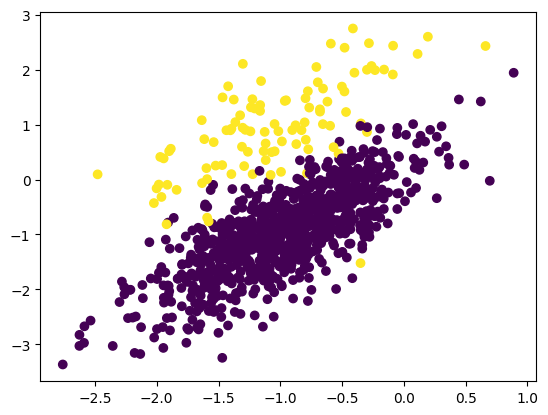

In [77]:
import matplotlib.pyplot as plt
plt.scatter(final_df['feature1'],final_df['feature2'], c=final_df['target'])

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['feature1','feature2']], final_df['target'])

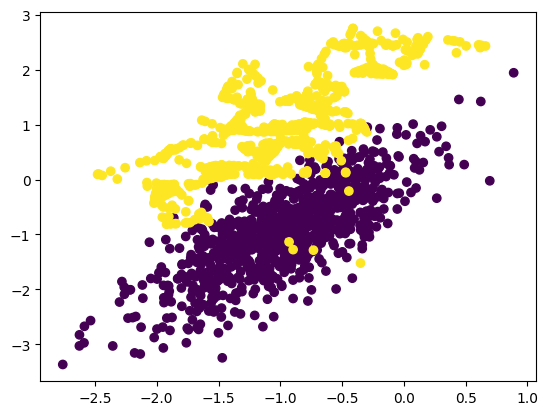

In [82]:
df1 = pd.DataFrame(X, columns=['feature1','feature2'])
df2 = pd.DataFrame(y, columns=['target'])
oversampled_df = pd.concat([df1,df2],axis=1)
plt.scatter(oversampled_df['feature1'],oversampled_df['feature2'], c=oversampled_df['target'])